<a href="https://colab.research.google.com/github/BashkirovIvan/BMT_ML/blob/main/%D0%9B%D0%A0_%E2%84%968_%D0%9A%D0%9C%D0%9E%D0%B8%D0%A0%D0%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание к лабораторной работе №8 по машинному обучению

линейная регрессия, полиномиаьная регрессия, регуляризация, логистическая регрессия

Датасет для задачи регрессии - load_diabetes

Датасет для задачи классификации - load_breast_cancer

1. Регрессия. Применить линейную (и модели с регуляризацией) и полиномиальную регрессию к датасету load_diabetes. Вывести метрики R2, MSE, MAE для двух моделей. Построить scatterplot predicted vs. true.
2. Классификация. Найти оптимальное значение параметра регуляризации $C$ с помощью LogisticRegressionCV – перебора параметров по сетке с последующей кросс-валидацией. Этот класс создан специально для логистической регрессии (для нее известны эффективные алгоритмы перебора параметров), для произвольной модели мы бы использовали GridSearchCV, RandomizedSearchCV. Построить график зависимости метрики ROC-AUC от параметра С.
3. Выбрать порог классификации для LogisticRegression на основе метрики  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

1.

Результаты моделей:
Линейная регрессия: R²: 0.4526027629719195, MSE: 2900.193628493482, MAPE: 0.3749982636756113
Полиномиальная регрессия: R²: 0.4156399336408033, MSE: 3096.028307344255, MAPE: 0.38285678514001176


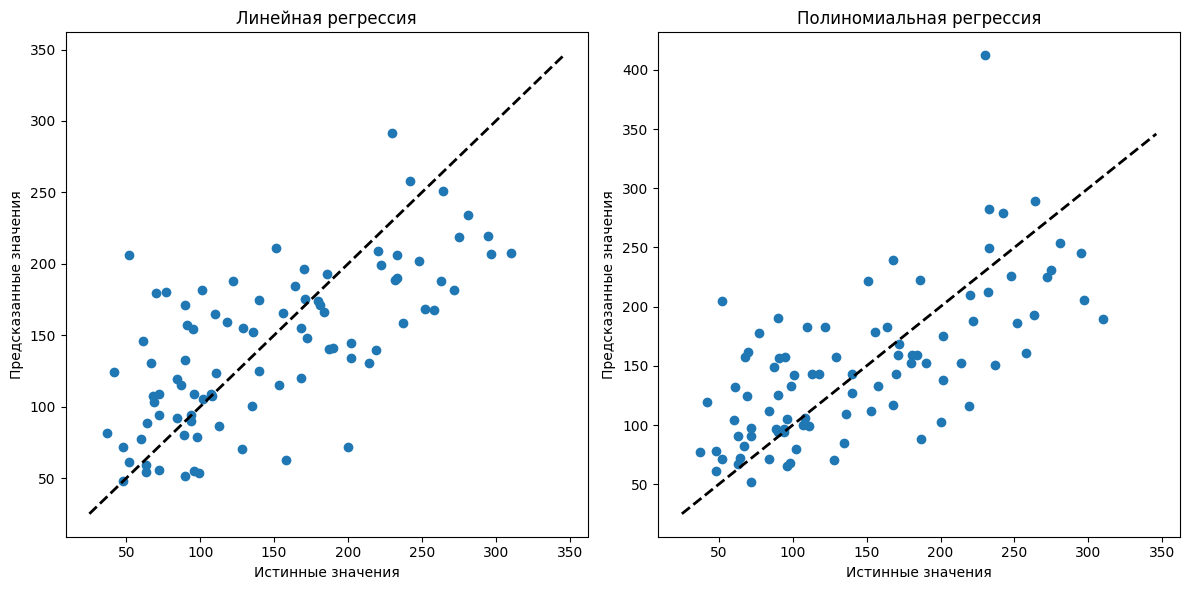

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

# Загрузка датасета
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Линейная регрессия
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Полиномиальная регрессия (степень 2)
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)

# Оценка моделей
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)  # Используем MAPE вместо MAE
    return r2, mse, mape

# Оценка линейной регрессии
r2_linear, mse_linear, mape_linear = evaluate_model(y_test, y_pred_linear)

# Оценка полиномиальной регрессии
r2_poly, mse_poly, mape_poly = evaluate_model(y_test, y_pred_poly)

# Вывод результатов
print("Результаты моделей:")
print(f"Линейная регрессия: R²: {r2_linear}, MSE: {mse_linear}, MAPE: {mape_linear}")
print(f"Полиномиальная регрессия: R²: {r2_poly}, MSE: {mse_poly}, MAPE: {mape_poly}")

# Построение scatterplot для предсказанных и истинных значений
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title('Линейная регрессия')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title('Полиномиальная регрессия')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')

plt.tight_layout()
plt.show()

Вывод. Для моделей с линейной и полиноминальной регрессей метрики показывают следующие результаты:
Средняя абсолютная ошибка (в процентах): наименьшее число ошибок демонстрирует линейная регрессия.
Среднеквадратичная ошибка:наименьшую ошибку допускает линейная регрессия.
R2 ошибка: наилучшие результаты демонстрирует линейная регрессия.


Дополнительно, я попробовал построить результаты работы для всех моделей с регуляризацией.

Линейная регрессия - R²: 0.4389, MSE: 2972.8515, MAE: 43.2455
Ridge регрессия - R²: 0.4420, MSE: 2956.2696, MAE: 43.2401
Lasso регрессия - R²: 0.4395, MSE: 2969.6780, MAE: 43.2397
ElasticNet регрессия - R²: 0.4436, MSE: 2948.0507, MAE: 43.2511
Полиноминальная регрессия - R²: 0.0362, MSE: 5106.2436, MAE: 53.7306


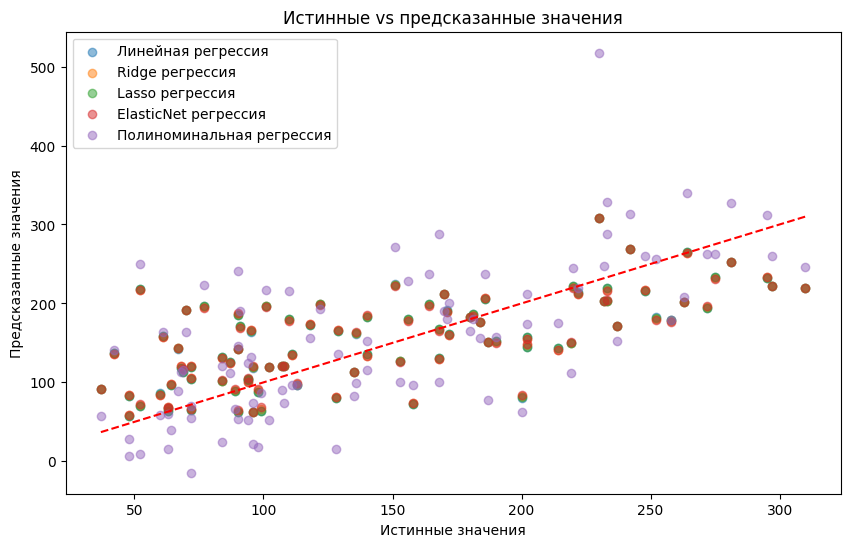

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Загрузка датасета
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

# Линейная регрессия
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

# Ridge регрессия
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Lasso регрессия
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# ElasticNet регрессия
elastic_model = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_model.fit(X_train_scaled, y_train)
y_pred_elastic = elastic_model.predict(X_test_scaled)

# Полиномиальная регрессия
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# Функция для вычисления метрик
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{model_name} - R²: {r2:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}")

# Оценка моделей
evaluate_model(y_test, y_pred_linear, "Линейная регрессия")
evaluate_model(y_test, y_pred_ridge, "Ridge регрессия")
evaluate_model(y_test, y_pred_lasso, "Lasso регрессия")
evaluate_model(y_test, y_pred_elastic, "ElasticNet регрессия")
evaluate_model(y_test, y_pred_poly, "Полиноминальная регрессия")

# Построение scatterplot predicted vs. true
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, label="Линейная регрессия", alpha=0.5)
plt.scatter(y_test, y_pred_ridge, label="Ridge регрессия", alpha=0.5)
plt.scatter(y_test, y_pred_lasso, label="Lasso регрессия", alpha=0.5)
plt.scatter(y_test, y_pred_elastic, label="ElasticNet регрессия", alpha=0.5)
plt.scatter(y_test, y_pred_poly, label="Полиноминальная регрессия", alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.title("Истинные vs предсказанные значения")
plt.legend()
plt.show()

Дополнительно, были получены те же метрики для модели с регуляризацией: Lasso, Ridge, ElasticNet регрессии дали результаты, демонстрирующие, что они лучше справляются с датасетом для этого задания. В частности, по R2 метрике наилучшие результаты демонстрирует ElasticNet.

2.

Оптимальное значение параметра C: 11.288378916846883
ROC-AUC на тестовой выборке: 0.9944


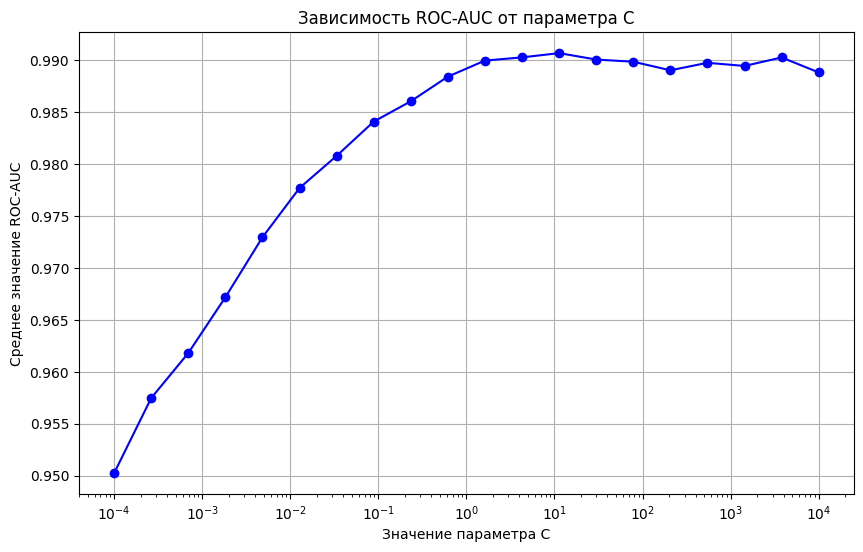

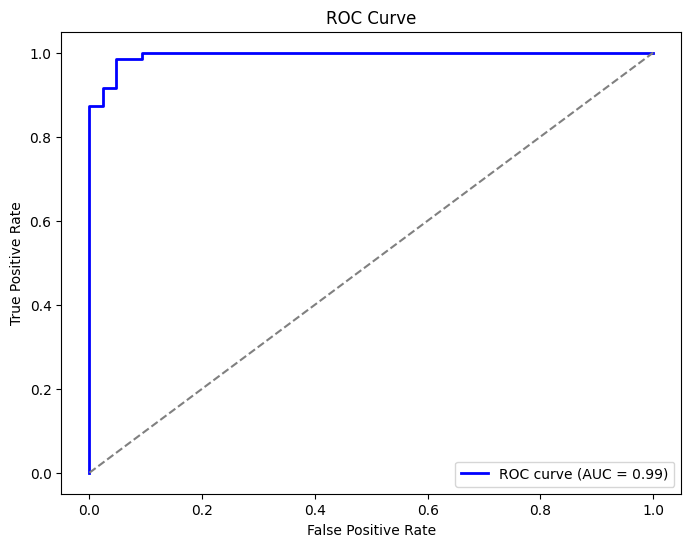

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score, roc_curve

# Загрузка датасета
data = load_breast_cancer()
X = data.data
y = data.target

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели LogisticRegressionCV с перебором параметра C
# Cs - набор значений параметра C для перебора
# cv - количество фолдов для кросс-валидации
# scoring - метрика для оптимизации (ROC-AUC)
# solver - алгоритм оптимизации ('liblinear' подходит для небольших датасетов)
model = LogisticRegressionCV(Cs=np.logspace(-4, 4, 20), cv=5, scoring='roc_auc', solver='liblinear', max_iter=1000)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание вероятностей для тестовой выборки
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Вычисление ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Оптимальное значение параметра C: {model.C_[0]}")
print(f"ROC-AUC на тестовой выборке: {roc_auc:.4f}")

# Построение графика зависимости ROC-AUC от параметра C
C_values = model.Cs_
mean_scores = model.scores_[1].mean(axis=0)  # Средние значения ROC-AUC для каждого C

plt.figure(figsize=(10, 6))
plt.plot(C_values, mean_scores, marker='o', linestyle='-', color='b')
plt.xscale('log')  # Логарифмическая шкала для оси X
plt.xlabel('Значение параметра C')
plt.ylabel('Среднее значение ROC-AUC')
plt.title('Зависимость ROC-AUC от параметра C')
plt.grid(True)
plt.show()

# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Вывод: был проведён поиск оптимального значения параметра регуляризации С для LogisticRegressionCV. Построена зависимость ROC-AUC метрики от C.

3.

Оптимальное значение параметра C: 11.288378916846883
ROC-AUC на тестовой выборке: 0.9944


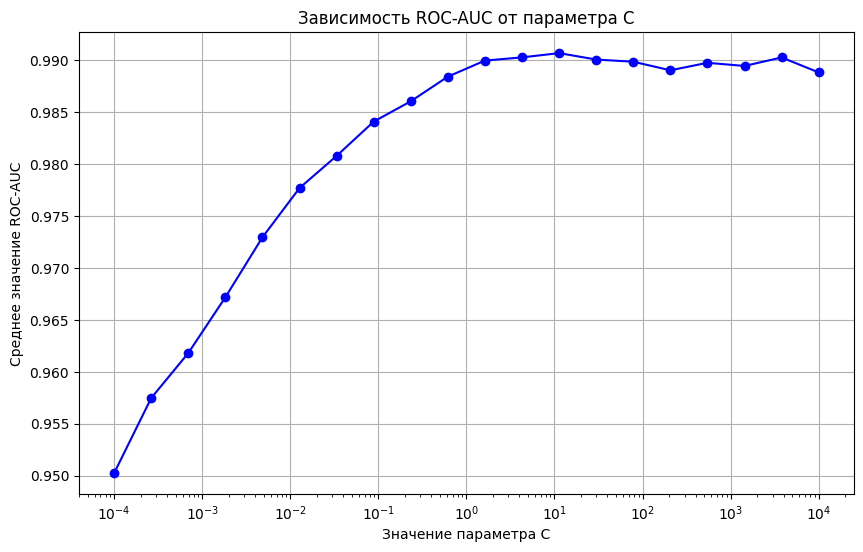

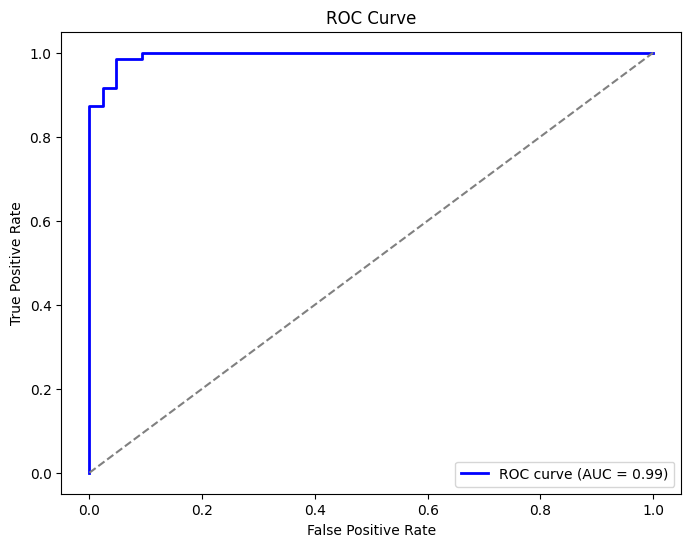

Оптимальный порог классификации: 0.7374
Максимальный F1-score: 0.9790
Матрица ошибок:
[[41  2]
 [ 1 70]]


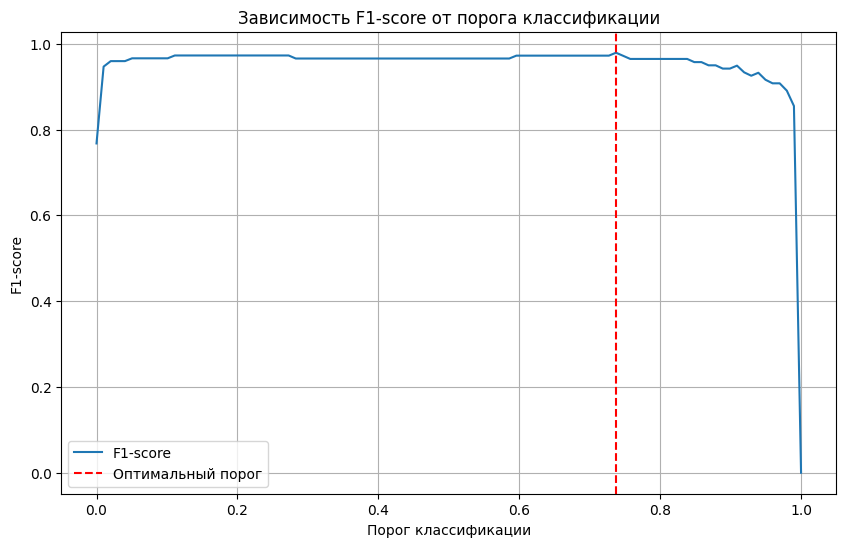

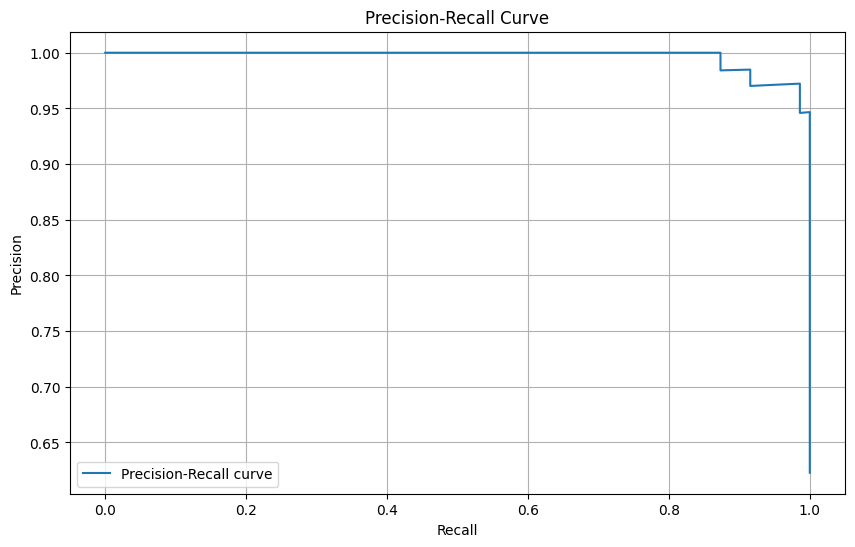

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_recall_curve, confusion_matrix

# Загрузка датасета
data = load_breast_cancer()
X = data.data
y = data.target

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели LogisticRegressionCV с перебором параметра C
# Cs - набор значений параметра C для перебора
# cv - количество фолдов для кросс-валидации
# scoring - метрика для оптимизации (ROC-AUC)
# solver - алгоритм оптимизации ('liblinear' подходит для небольших датасетов)
model = LogisticRegressionCV(Cs=np.logspace(-4, 4, 20), cv=5, scoring='roc_auc', solver='liblinear', max_iter=1000)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание вероятностей для тестовой выборки
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Вычисление ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Оптимальное значение параметра C: {model.C_[0]}")
print(f"ROC-AUC на тестовой выборке: {roc_auc:.4f}")

# Построение графика зависимости ROC-AUC от параметра C
C_values = model.Cs_
mean_scores = model.scores_[1].mean(axis=0)  # Средние значения ROC-AUC для каждого C

plt.figure(figsize=(10, 6))
plt.plot(C_values, mean_scores, marker='o', linestyle='-', color='b')
plt.xscale('log')  # Логарифмическая шкала для оси X
plt.xlabel('Значение параметра C')
plt.ylabel('Среднее значение ROC-AUC')
plt.title('Зависимость ROC-AUC от параметра C')
plt.grid(True)
plt.show()

# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Поиск оптимального порога классификации на основе F1-score ###
thresholds = np.linspace(0, 1, 100)  # Перебираем пороги от 0 до 1
f1_scores = [f1_score(y_test, y_pred_proba >= t) for t in thresholds]  # Вычисляем F1-score для каждого порога

# Находим порог, который максимизирует F1-score
optimal_threshold = thresholds[np.argmax(f1_scores)]
optimal_f1 = np.max(f1_scores)

print(f'Оптимальный порог классификации: {optimal_threshold:.4f}')
print(f'Максимальный F1-score: {optimal_f1:.4f}')

# Применяем оптимальный порог для классификации
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Выводим матрицу ошибок
conf_matrix = confusion_matrix(y_test, y_pred_optimal)
print("Матрица ошибок:")
print(conf_matrix)

# Построение графика зависимости F1-score от порога
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1-score')
plt.axvline(optimal_threshold, color='red', linestyle='--', label='Оптимальный порог')
plt.xlabel('Порог классификации')
plt.ylabel('F1-score')
plt.title('Зависимость F1-score от порога классификации')
plt.legend()
plt.grid()
plt.show()

# Построение Precision-Recall кривой
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

Вывод: на основании предыдущего пункта мы взяли оптимальное значение параметра регуляризации С и с помощью F1-метрики определили оптимальный порог классификации.